In [ ]:
# Kaggle token kaggle.json
FILEID = "1klOGnFBeHWqtNL9VwnxxhTruXkTNaR-H"#
# Download kaggle.json using wget
# Note: This wget command for Google Drive can be fragile.
# Ensure the file is publicly accessible for this to work reliably.
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O kaggle.json && rm -rf /tmp/cookies.txt
!dir # Check if kaggle.json is downloaded in the current directory

--2025-06-03 01:44:39--  https://docs.google.com/uc?export=download&confirm=&id=1klOGnFBeHWqtNL9VwnxxhTruXkTNaR-H
Resolving docs.google.com (docs.google.com)... 142.250.141.138, 142.250.141.102, 142.250.141.139, ...
Connecting to docs.google.com (docs.google.com)|142.250.141.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1klOGnFBeHWqtNL9VwnxxhTruXkTNaR-H&export=download [following]
--2025-06-03 01:44:39--  https://drive.usercontent.google.com/download?id=1klOGnFBeHWqtNL9VwnxxhTruXkTNaR-H&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.141.132, 2607:f8b0:4023:c0b::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.141.132|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2025-06-03 01:44:40 ERROR 404: Not Found.

kaggle.json  sample_data


In [ ]:
# Install kaggle if not already installed
# This is often pre-installed in Colab, but good to include
#!pip install kaggle

from kaggle.api.kaggle_api_extended import KaggleApi
import os
import shutil # Import the shutil module



# Create the directory where Kaggle expects the config file
config_dir = '/root/.config/kaggle'
os.makedirs(config_dir, exist_ok=True)

# Move the downloaded kaggle.json to the correct location
# Check if kaggle.json exists before attempting to move
if os.path.exists('kaggle.json'):
    shutil.move('kaggle.json', os.path.join(config_dir, 'kaggle.json'))
    print(f"Moved kaggle.json to {config_dir}")
else:
    print("kaggle.json not found in the current directory after wget. Download failed?")
    # You might want to exit or raise an error here if the file is critical

# Verify if the file exists in the target location
if os.path.exists(os.path.join(config_dir, 'kaggle.json')):
    print(f"kaggle.json successfully placed in {config_dir}")
else:
    print(f"kaggle.json not found in {config_dir}. File move failed?")
    # You might want to exit or raise an error here

# Authenticate with Kaggle
# The API expects kaggle.json in the location pointed to by KAGGLE_CONFIG_DIR
# or in the default location (~/.kaggle or /root/.config/kaggle in Colab)
os.environ['KAGGLE_USERNAME'] = 'andres alvarez' # Replace with your username
os.environ['KAGGLE_KEY'] = '003d8fedef2a854e6c60da7c0fb2b5cc'

api = KaggleApi()
api.authenticate() # This is where the error occurred previously

print("Kaggle Authentication Successful!")

# Specify the dataset you want to download
# Replace 'user-name/dataset-name' with the actual dataset identifier
dataset_id = 'deathperminut/kdm-database-spiners'

# Specify the path where you want to download the dataset (e.g., '/content/datasets')
download_path = '/dataset'

# Create the download directory if it doesn't exist
os.makedirs(download_path, exist_ok=True)

# Download the dataset
api.dataset_download_files(dataset_id, path=download_path, unzip=True)

print(f"Dataset '{dataset_id}' downloaded and unzipped to '{download_path}'")

# The subsequent cell is separate and uses a different command format
# Remove or fix this command as it's incomplete and might cause syntax errors
# !kaggle datasets download -d <jdarioagudelog/kdmkankshexrandom>

Moved kaggle.json to /root/.config/kaggle
kaggle.json successfully placed in /root/.config/kaggle
Kaggle Authentication Successful!
Dataset URL: https://www.kaggle.com/datasets/deathperminut/kdm-database-spiners
Dataset 'deathperminut/kdm-database-spiners' downloaded and unzipped to '/dataset'


In [ ]:
import os
for dirname, _, filenames in os.walk('/dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/dataset/data.npy.npz


In [ ]:
import numpy as np
X_ = np.load('/dataset/data.npy.npz')
keys_ = X_.keys()

In [ ]:
for key in keys_:
  print(f"Key: {key}")
  print(f"Value: {X_[key].shape}")

Key: Nest
Value: (164212,)
Key: L
Value: (164212,)
Key: rd
Value: (164212,)
Key: So
Value: (164212,)
Key: T
Value: (164212,)
Key: Jex
Value: (164212,)
Key: Jex2
Value: (164212,)
Key: Jex3
Value: (164212,)
Key: Jex4
Value: (164212,)
Key: Kan1
Value: (164212,)
Key: KanS
Value: (164212,)
Key: Hex
Value: (164212,)
Key: kd
Value: (164212,)
Key: KDM
Value: (164212,)
Key: MS
Value: (164212, 39, 39, 1)


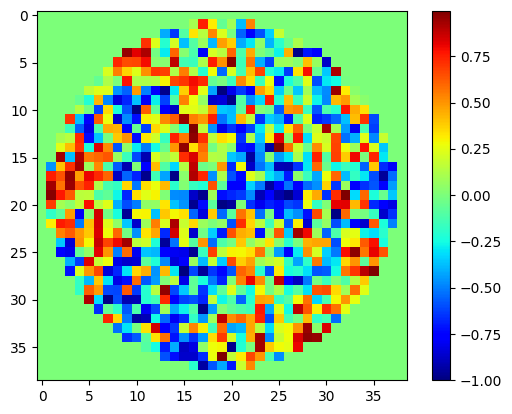

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(X_['MS'][0],cmap='jet')
plt.colorbar()

# UMAP desde imágenes

In [ ]:
import cuml
import cudf
import os.path
from sklearn.preprocessing import MinMaxScaler


from cuml.manifold.umap import UMAP as cuUMAP

print('cuml:',cuml.__version__)

cuumap = cuUMAP(n_components=2,             # The dimension of the space to embed into.
                n_neighbors=500,             # The size of local neighborhood (from 1 to 100)
                local_connectivity=1,       # rho
                random_state=42,
                #n_epochs=100,               # The number of iterations to run
                #learning_rate=0.01          # The learning rate
                )

cuml: 25.02.01
[2025-06-03 02:00:56.951] [CUML] [info] build_algo set to brute_force_knn because random_state is given


In [ ]:
scaX_ = MinMaxScaler()
sca_ = MinMaxScaler()
Z = sca_.fit_transform(cuumap.fit_transform(scaX_.fit_transform(X_['MS'].reshape(X_['MS'].shape[0],-1))))

In [ ]:
import matplotlib as mpl

def plot_image_scatter(X,Z,y,th_ = 0.05,zoom=0.5,xlabel_='',ylabel_=''):
  plt.figure(figsize=(10, 8))
  cmap = plt.cm.tab10
  plt.scatter(Z[:, 0], Z[:, 1], c=y, s=30, cmap=cmap,alpha=0.25)
  image_positions = np.array([[1., 1.]])
  for index, position in enumerate(Z):
      dist = np.sum((position - image_positions) ** 2, axis=1)
      if np.min(dist) > th_: # if far enough from other images
          image_positions = np.r_[image_positions, [position]]
          imagebox = mpl.offsetbox.AnnotationBbox(
              mpl.offsetbox.OffsetImage(X[index], zoom=zoom, cmap="jet"),
              position,frameon=False)#, bboxprops={"edgecolor": cmap(y[index]), "lw": 2})
          plt.gca().add_artist(imagebox)
  #plt.axis("off")
  plt.xlabel(xlabel_)
  plt.ylabel(ylabel_)

  plt.show()
  return

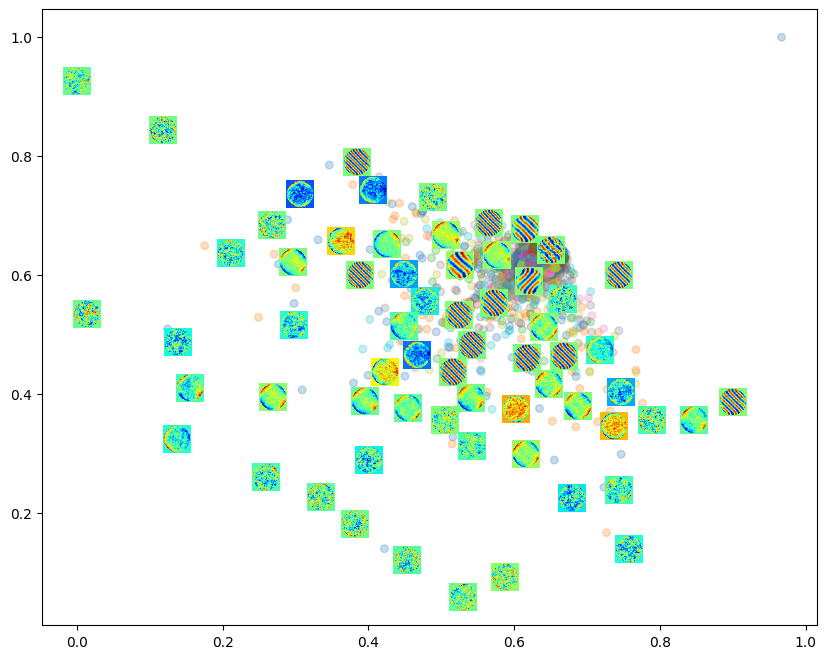

In [ ]:

Ns = 80000
# Generate random indices
ind = np.random.choice(X_['MS'].shape[0], size=Ns, replace=False)

plot_image_scatter(X_['MS'][ind],Z[ind],y[ind],th_=0.0025)

# UMAP desde parámetros

In [ ]:
A = []
par_ = []
for key in X_.keys():
  if key != 'MS':
    A.append(X_[key])
    par_.append(key)


In [ ]:
A = np.array(A).T
A.shape

(164212, 14)

<ipython-input-77-3d94ca54c119>:14: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(A[:, i], ax=axes[i], fill=True)
<ipython-input-77-3d94ca54c119>:14: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(A[:, i], ax=axes[i], fill=True)
<ipython-input-77-3d94ca54c119>:14: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(A[:, i], ax=axes[i], fill=True)
<ipython-input-77-3d94ca54c119>:14: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(A[:, i], ax=axes[i], fill=True)
<ipython-input-77-3d94ca54c119>:14: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(A[:, i], ax=axes[i], fill=True)
<ipython-i

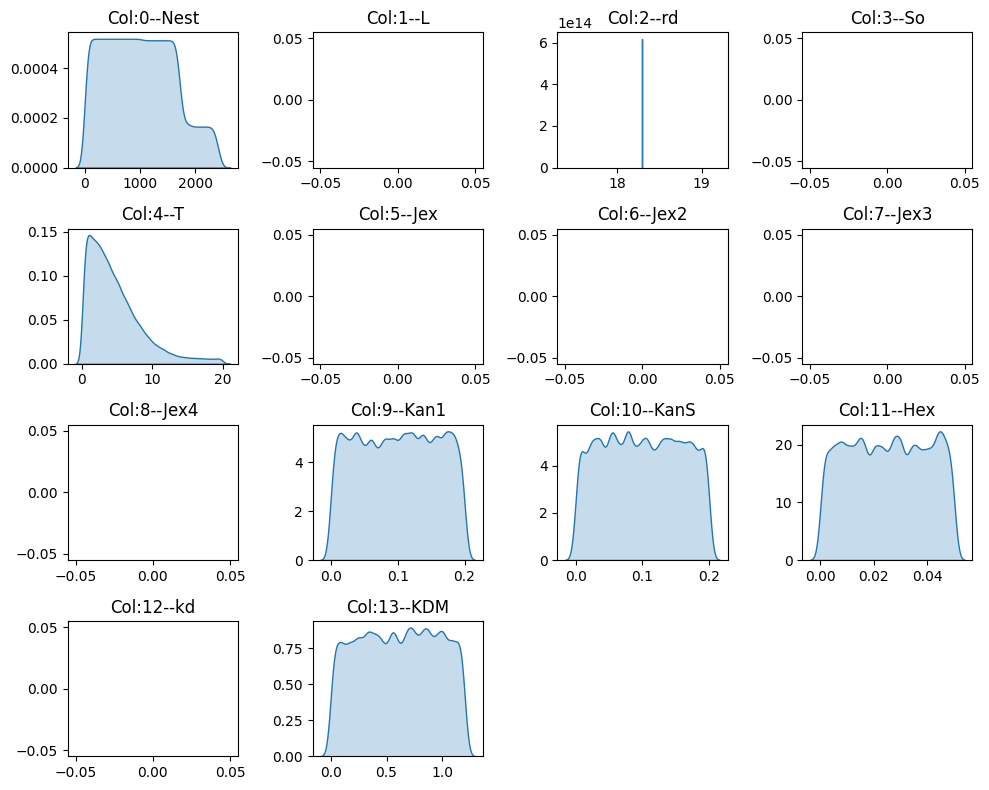

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'A' is a NumPy array with columns you want to visualize
# Make sure 'A' is defined and populated with your data before running this code

num_cols = A.shape[1]
num_rows = (num_cols + 3) // 4 # Calculate the number of rows needed

fig, axes = plt.subplots(num_rows, 4, figsize=(10, 2 * num_rows))
axes = axes.flatten() # Flatten the 2D array of axes for easier iteration

for i in range(num_cols):
    sns.kdeplot(A[:, i], ax=axes[i], fill=True)
    axes[i].set_title(f'Col:{i}--{par_[i]}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Hide any unused subplots
for j in range(num_cols, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
cuumap_A = cuUMAP(n_components=2,             # The dimension of the space to embed into.
                n_neighbors=50,             # The size of local neighborhood (from 1 to 100)
                local_connectivity=1,       # rho
                random_state=42,
                #n_epochs=100,               # The number of iterations to run
                #learning_rate=0.01          # The learning rate
                )

[2025-06-03 02:22:12.060] [CUML] [info] build_algo set to brute_force_knn because random_state is given


In [ ]:
cols_ = [0,4,9,10,11,13]
scaA_ = MinMaxScaler()
sca__ = MinMaxScaler()
ZA = sca__.fit_transform(cuumap_A.fit_transform(scaA_.fit_transform(A[:,cols_])))

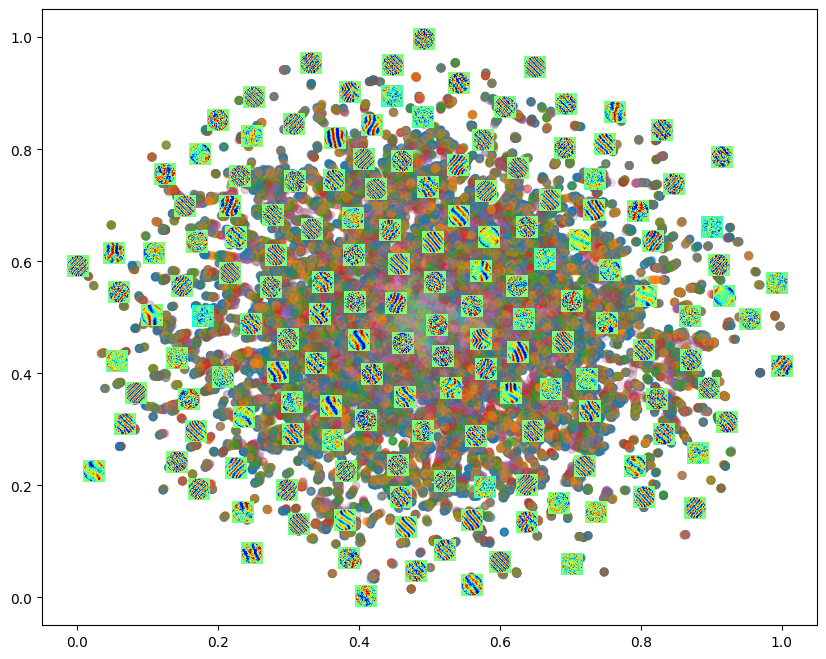

In [ ]:
y = X_['T']
plot_image_scatter(X_['MS'][ind],ZA[ind],y[ind],th_=0.003,zoom=0.4)

# Clustering desde imágenes

In [ ]:
import cuml
import cudf
import numpy as np



# Convert the scaled data to a cuDF DataFrame or cuML array
# This is necessary for cuML algorithms
X_gpu = cudf.DataFrame(ZA)#(X_scaled)

# Choose the number of clusters
n_clusters = 10  # You can adjust this based on your data and needs

# Initialize and fit the KMeans model from cuML
kmeans_gpu = cuml.cluster.KMeans(n_clusters=n_clusters, random_state=42)
kmeans_gpu.fit(X_gpu)

# Get the cluster labels
# The labels are on the GPU, so convert them back to a NumPy array
labels = kmeans_gpu.labels_.to_numpy()

# Now 'labels' contains the cluster assignment for each image in X_['MS']
print("Cluster labels generated.")
print(f"Shape of labels: {labels.shape}")

# You can now use these labels for analysis or visualization
# For example, to count the number of images in each cluster:
unique_labels, counts = np.unique(labels, return_counts=True)
for label, count in zip(unique_labels, counts):
    print(f"Cluster {label}: {count} images")



Cluster labels generated.
Shape of labels: (164212,)
Cluster 0: 17787 images
Cluster 1: 13503 images
Cluster 2: 11462 images
Cluster 3: 15569 images
Cluster 4: 15541 images
Cluster 5: 22223 images
Cluster 6: 11935 images
Cluster 7: 17068 images
Cluster 8: 24406 images
Cluster 9: 14718 images


/usr/local/lib/python3.11/dist-packages/cuml/internals/api_decorators.py:195: FutureWarning: The default value of `n_init` will change from 1 to 'auto' in 25.04. Set the value of `n_init` explicitly to suppress this warning.
  return func(*args, **kwargs)


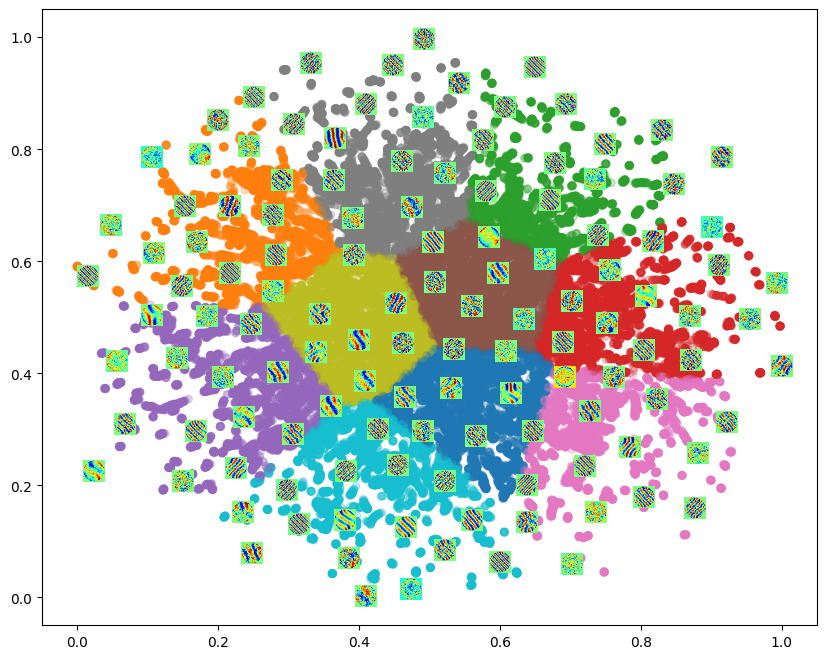

In [ ]:
y = labels
plot_image_scatter(X_['MS'][ind],ZA[ind],y[ind],th_=0.004,zoom=0.4)

# 2D T vs KDM

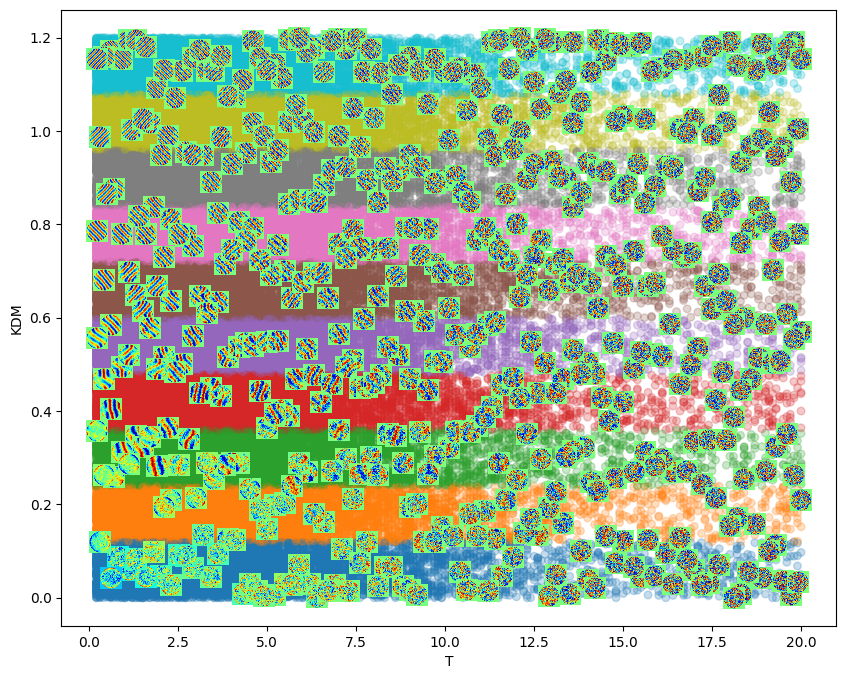

In [ ]:
y = X_['KDM']
col_ = [4,13] #T vs KDM
Ac = A[:,col_]
plot_image_scatter(X_['MS'][ind],Ac[ind],y[ind],th_=0.03,zoom=0.4,xlabel_='T',ylabel_='KDM')

# 2D T vs Nest

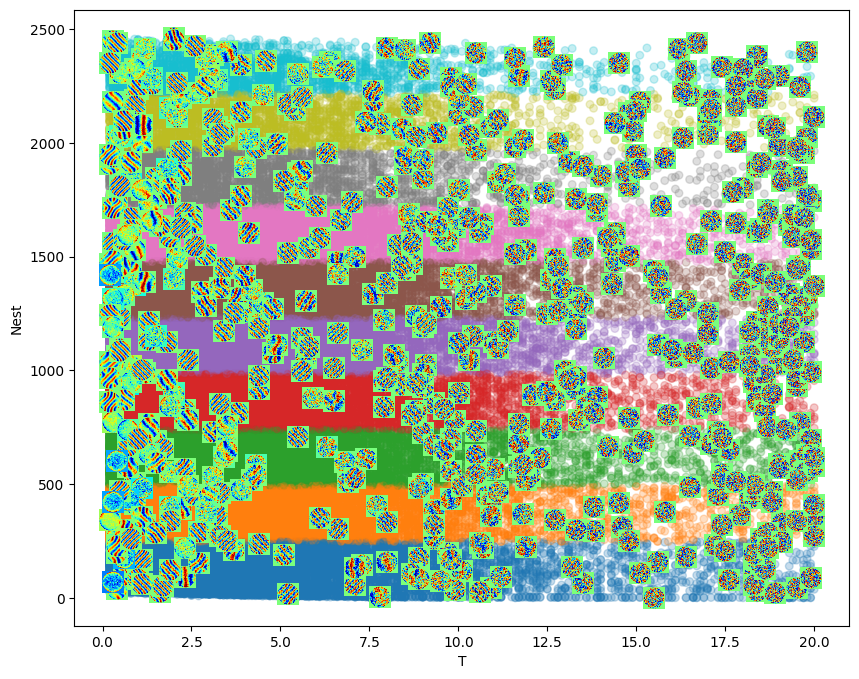

In [ ]:
y = X_['Nest']
col_ = [4,0] #T vs KDM
Ac = A[:,col_]
plot_image_scatter(X_['MS'][ind],Ac[ind],y[ind],th_=60,zoom=0.4,xlabel_='T',ylabel_='Nest')

# 2D T vs Kan1

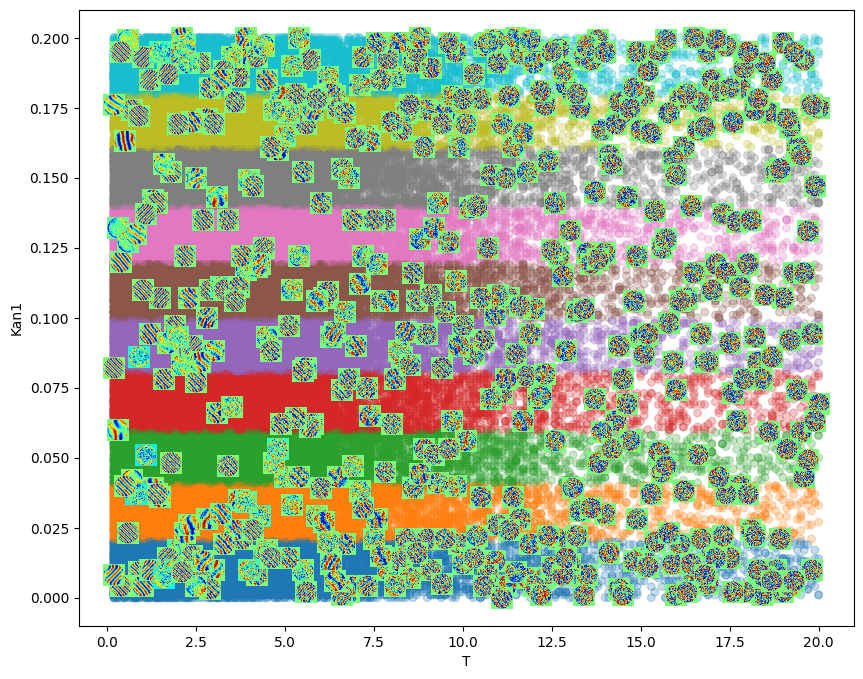

In [ ]:
y = X_['Kan1']
col_ = [4,9] #T vs Kan1
Ac = A[:,col_]
plot_image_scatter(X_['MS'][ind],Ac[ind],y[ind],th_=0.005,zoom=0.4,xlabel_='T',ylabel_='Kan1')

# 2D KDM vs Nest

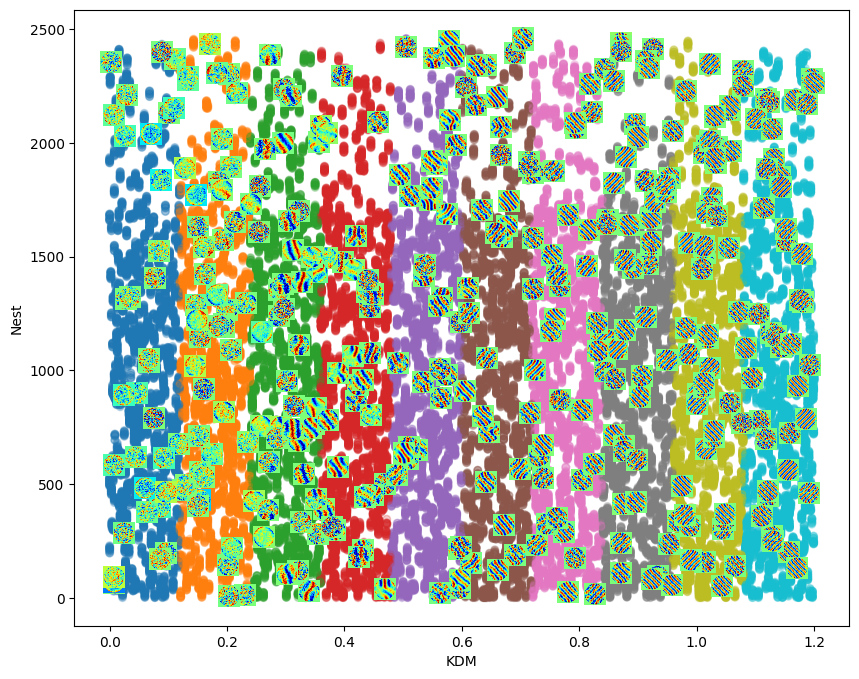

In [ ]:
y = X_['KDM']
col_ = [13,0] #KDM vs Nest
Ac = A[:,col_]
plot_image_scatter(X_['MS'][ind],Ac[ind],y[ind],th_=20,zoom=0.4,xlabel_='KDM',ylabel_='Nest')